In [80]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For basic data visualization
import seaborn as sns  # For enhanced data visualization
import plotly.express as px  # For interactive visualizations
import plotly.graph_objects as go  # For creating interactive plots

In [8]:
# Defining the file path to my dataset
filename = 'C:/Users/Arka/Downloads/Dataset/zomato.csv'

# Reading the dataset into a DataFrame using pandas
df = pd.read_csv(filename)

# Displaying the first few rows of the DataFrame to get an initial look
df.head()

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [9]:
# Getting the shape of the DataFrame (number of rows and columns)
df.shape

(7105, 12)

In [90]:
# Getting the column names of the DataFrame
df.columns

Index(['Restaurant Name', 'Restaurant Type', 'Rating', 'Number of Ratings',
       'Average Cost for Two', 'Online Order', 'Table Booking', 'Cuisine Type',
       'Local Address'],
      dtype='object')

In [11]:
# Dropping the specified columns 'Unnamed: 0.1' and 'Unnamed: 0' from the DataFrame
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

# Displaying the first few rows of the DataFrame after dropping the columns
df.head()


,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [12]:
# Displaying concise information about the DataFrame, including data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restaurant name        7105 non-null   object 
 1   restaurant type        7105 non-null   object 
 2   rate (out of 5)        7037 non-null   float64
 3   num of ratings         7105 non-null   int64  
 4   avg cost (two people)  7048 non-null   float64
 5   online_order           7105 non-null   object 
 6   table booking          7105 non-null   object 
 7   cuisines type          7105 non-null   object 
 8   area                   7105 non-null   object 
 9   local address          7105 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 555.2+ KB


In [13]:
# Removing duplicate rows from the DataFrame and modifying it in place
df.drop_duplicates(inplace=True)

# Getting the updated shape of the DataFrame (number of rows and columns)
df.shape


(7105, 10)

In [15]:
# Getting the unique values in the 'restaurant name' column of the DataFrame
unique_restaurant_names = df['restaurant name'].unique()


array(['#FeelTheROLL', '#L-81 Cafe', '#refuel', ..., "Zu's Doner Kebaps",
       'Zyara', 'Zyksha'], dtype=object)

In [25]:
# Define a function to clean restaurant names by removing '#', '@', and trailing dots
def clean_restaurant_name(name):
    name = name.replace('#', '').strip(' .')  # Remove '#' and trailing dots
    name = name.replace('@', '').strip(' .')  # Remove '@' and trailing dots
    name = name.replace("'", "")  # Remove apostrophes
    return name

# Applying the clean_restaurant_name function to the 'restaurant name' column
df['restaurant name'] = df['restaurant name'].apply(clean_restaurant_name)

# Displaying the first few cleaned restaurant names
df['restaurant name'].head()


0         FeelTheROLL
1           L-81 Cafe
2              refuel
3     Biryani Central
4             The Bbq
Name: restaurant name, dtype: object

In [28]:
# Displaying the first 20 rows of the DataFrame
df.head(20)


,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur
5,99,"Takeaway, Delivery",3.4,37,200.0,No,No,"Mughlai, Biryani, Chinese, North Indian",Whitefield,Whitefield
6,Italy,Casual Dining,4.1,305,700.0,Yes,No,Italian,Banashankari,Kumaraswamy Layout
7,North Parontha Hut,"Takeaway, Delivery",2.8,40,300.0,No,No,North Indian,Indiranagar,Old Airport Road
8,1000 B.C,Quick Bites,3.2,49,300.0,Yes,No,"Arabian, Sandwich, Rolls, Burger","Byresandra,Tavarekere,Madiwala",Koramangala 5th Block
9,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,Casual Dining,3.7,41,450.0,No,No,"Biryani, North Indian","Byresandra,Tavarekere,Madiwala",BTM


In [30]:
# Identifying columns with null values
null_columns = df.columns[df.isnull().any()]

# Checking if there are any columns with null values
if len(null_columns) > 0:
    print("Columns with null values:")
    for column in null_columns:
        print(f"{column}: {df[column].isnull().sum()} null values")
else:
    print("No columns have null values")


Columns with null values:
rate (out of 5): 68 null values
avg cost (two people): 57 null values


In [31]:
# Calculating the mean of 'rate (out of 5)' and 'avg cost (two people)' columns
mean_rate = df['rate (out of 5)'].mean()
mean_avg_cost = df['avg cost (two people)'].mean()

# Creating a copy of the DataFrame to fill null values with mean values
df_filled = df.copy()
df_filled['rate (out of 5)'].fillna(mean_rate, inplace=True)
df_filled['avg cost (two people)'].fillna(mean_avg_cost, inplace=True)


In [33]:
# Identifying columns with null values in the filled DataFrame
null_columns = df_filled.columns[df_filled.isnull().any()]

# Checking if there are any columns with null values
if len(null_columns) > 0:
    print("Columns with null values:")
    for column in null_columns:
        print(f"{column}: {df_filled[column].isnull().sum()} null values")
else:
    print("No columns have null values")


No columns have null values


In [36]:
# Displaying concise information about the filled DataFrame, including data types and non-null counts
df_filled.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 7105 entries, 0 to 7104
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restaurant name        7105 non-null   object 
 1   restaurant type        7105 non-null   object 
 2   rate (out of 5)        7105 non-null   float64
 3   num of ratings         7105 non-null   int64  
 4   avg cost (two people)  7105 non-null   float64
 5   online_order           7105 non-null   object 
 6   table booking          7105 non-null   object 
 7   cuisines type          7105 non-null   object 
 8   area                   7105 non-null   object 
 9   local address          7105 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 610.6+ KB


In [37]:
# Getting the column names of the filled DataFrame
df_filled.columns


Index(['restaurant name', 'restaurant type', 'rate (out of 5)',
       'num of ratings', 'avg cost (two people)', 'online_order',
       'table booking', 'cuisines type', 'area', 'local address'],
      dtype='object')

In [42]:
# Mapping of old column names to new column names
column_name_mapping = {
    'restaurant name': 'Restaurant Name',
    'restaurant type': 'Restaurant Type',
    'rate (out of 5)': 'Rating',
    'num of ratings': 'Number of Ratings',
    'avg cost (two people)': 'Average Cost for Two',
    'online_order': 'Online Order',
    'table booking': 'Table Booking',
    'cuisines type': 'Cuisine Type',
    'area': 'Area',
    'local address': 'Local Address'
}

# Renaming the columns in the filled DataFrame using the mapping
df_filled.rename(columns=column_name_mapping, inplace=True)


In [43]:
# Displaying the column names of the filled DataFrame after renaming
df_filled.columns


Index(['Restaurant Name', 'Restaurant Type', 'Rating', 'Number of Ratings',
       'Average Cost for Two', 'Online Order', 'Table Booking', 'Cuisine Type',
       'Area', 'Local Address'],
      dtype='object')

In [44]:
# Assigning the original DataFrame 'df' to 'df_filled'
df_filled = df


In [45]:
# Displaying the column names of the original DataFrame 'df'
df.columns


Index(['Restaurant Name', 'Restaurant Type', 'Rating', 'Number of Ratings',
       'Average Cost for Two', 'Online Order', 'Table Booking', 'Cuisine Type',
       'Area', 'Local Address'],
      dtype='object')

In [46]:
# Getting the unique values in the 'Local Address' column of the original DataFrame 'df'
unique_local_addresses = df['Local Address'].unique()


array(['Bellandur', 'Byresandra,Tavarekere,Madiwala', 'Bannerghatta Road',
       'Marathahalli', 'Whitefield', 'Banashankari', 'Indiranagar',
       'Electronic City', 'Old Airport Road', 'Basavanagudi',
       'Malleshwaram', 'Kalyan Nagar', 'Rajajinagar', 'Brigade Road',
       'Koramangala 7th Block', 'JP Nagar', 'Lavelle Road',
       'Sarjapur Road', 'HSR', 'Frazer Town', 'Kammanahalli',
       'New BEL Road', 'Jayanagar', 'Brookefield',
       'Koramangala 5th Block', 'Koramangala 4th Block',
       'Koramangala 6th Block', 'Church Street', 'MG Road',
       'Residency Road'], dtype=object)

In [47]:
# Getting the unique values in the 'Area' column of the original DataFrame 'df'
unique_areas = df['Area'].unique()


array(['Bellandur', 'Byresandra,Tavarekere,Madiwala', 'Bannerghatta Road',
       'Marathahalli', 'Whitefield', 'Banashankari', 'Indiranagar',
       'Electronic City', 'Old Airport Road', 'Basavanagudi',
       'Malleshwaram', 'Kalyan Nagar', 'Rajajinagar', 'Brigade Road',
       'Koramangala 7th Block', 'JP Nagar', 'Lavelle Road',
       'Sarjapur Road', 'HSR', 'Frazer Town', 'Kammanahalli',
       'New BEL Road', 'Jayanagar', 'Brookefield',
       'Koramangala 5th Block', 'Koramangala 4th Block',
       'Koramangala 6th Block', 'Church Street', 'MG Road',
       'Residency Road'], dtype=object)

In [49]:
# Dropping the 'Area' column from the original DataFrame 'df'
df.drop(columns=['Area'], inplace=True)


KeyError: "['Area'] not found in axis"

In [50]:
# Displaying the first few rows of the original DataFrame 'df'
df.head()


,Restaurant Name,Restaurant Type,Rating,Number of Ratings,Average Cost for Two,Online Order,Table Booking,Cuisine Type,Local Address
0,FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur
1,L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages",HSR
2,refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road
3,Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli
4,The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur


#  Data is Clean

E:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]),
 [Text(0, 0, 'Bellandur'),
  Text(1, 0, 'HSR'),
  Text(2, 0, 'Bannerghatta Road'),
  Text(3, 0, 'Marathahalli'),
  Text(4, 0, 'Whitefield'),
  Text(5, 0, 'Kumaraswamy Layout'),
  Text(6, 0, 'Old Airport Road'),
  Text(7, 0, 'Koramangala 5th Block'),
  Text(8, 0, 'BTM'),
  Text(9, 0, 'Electronic City'),
  Text(10, 0, 'Indiranagar'),
  Text(11, 0, 'Koramangala 3rd Block'),
  Text(12, 0, 'JP Nagar'),
  Text(13, 0, 'Malleshwaram'),
  Text(14, 0, 'Kammanahalli'),
  Text(15, 0, 'Rajajinagar'),
  Text(16, 0, 'Basavanagudi'),
  Text(17, 0, 'Infantry Road'),
  Text(18, 0, 'Kalyan Nagar'),
  T

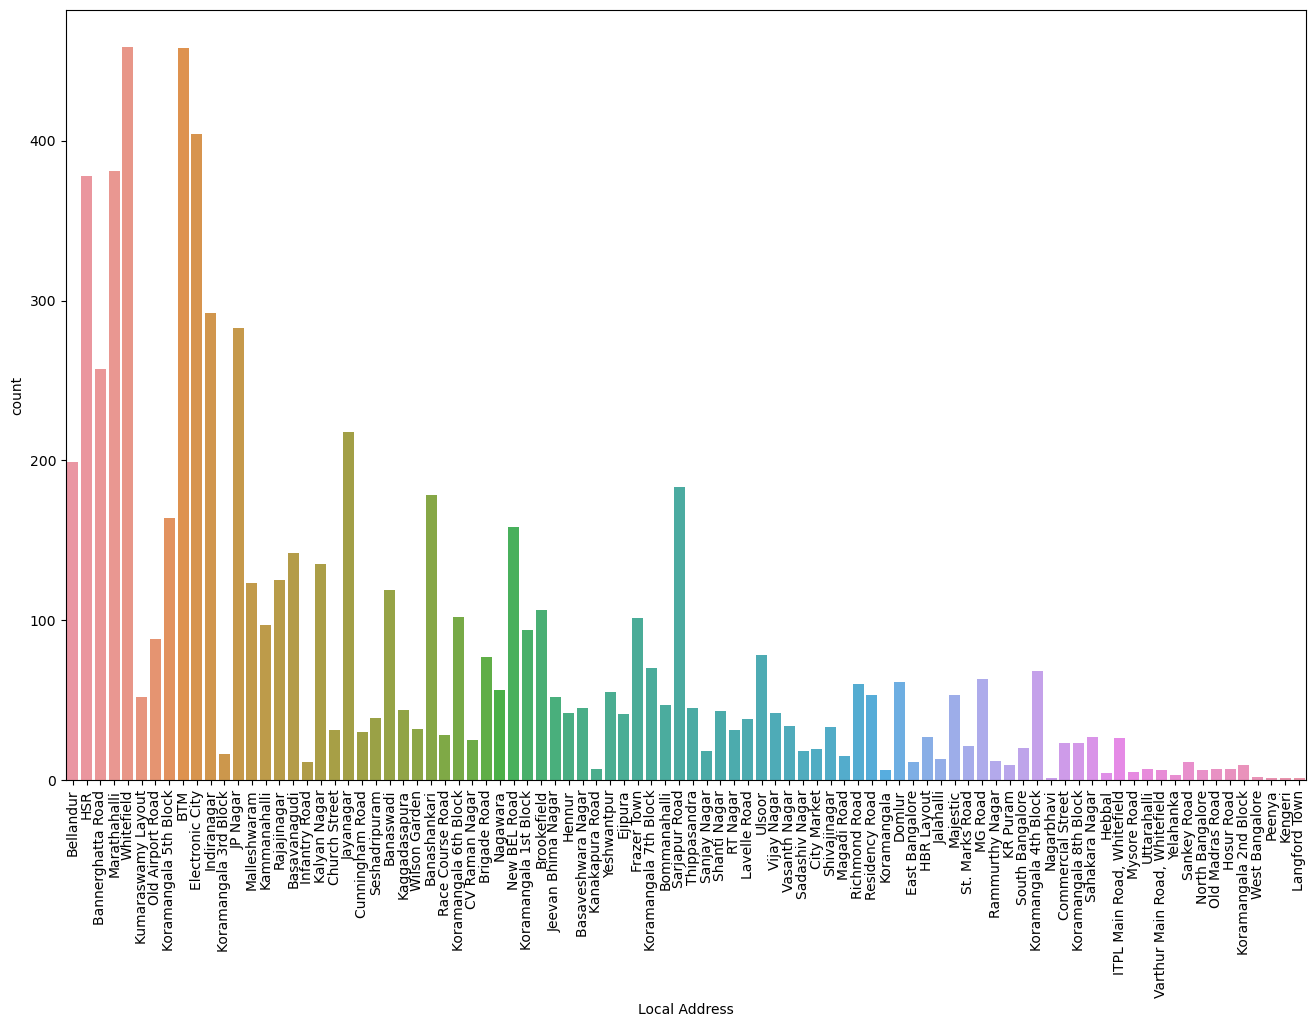

In [52]:
# Creating a count plot for the 'Local Address' column using seaborn
plt.figure(figsize=(16, 10))
ax = sns.countplot(df['Local Address'])
plt.xticks(rotation=90)


E:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Online Order', ylabel='count'>

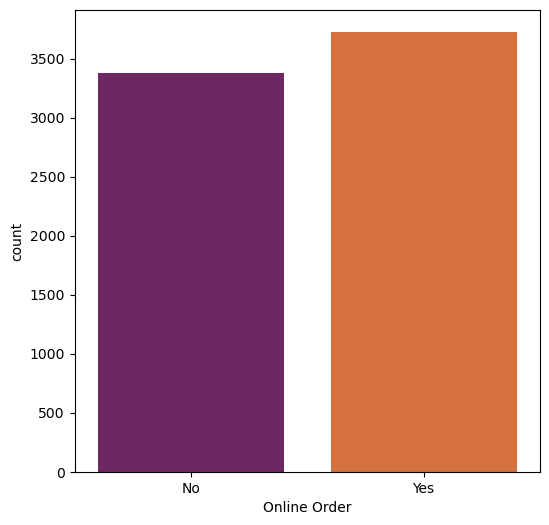

In [53]:
# Creating a count plot for the 'Online Order' column using seaborn with a specific color palette
plt.figure(figsize=(6, 6))
sns.countplot(df['Online Order'], palette='inferno')


E:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Table Booking', ylabel='count'>

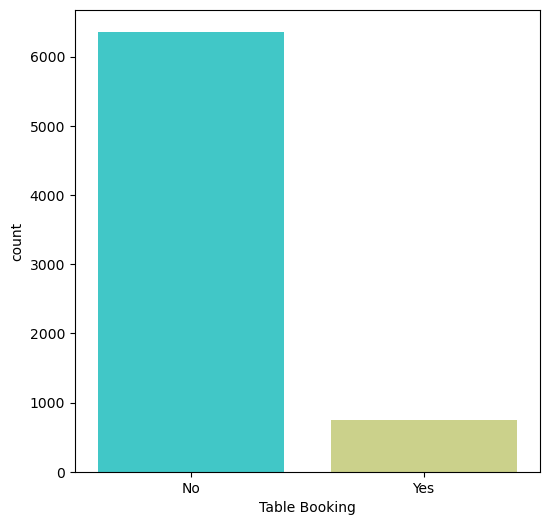

In [54]:
# Creating a count plot for the 'Table Booking' column using seaborn with a specific color palette
plt.figure(figsize=(6, 6))
sns.countplot(df['Table Booking'], palette='rainbow')


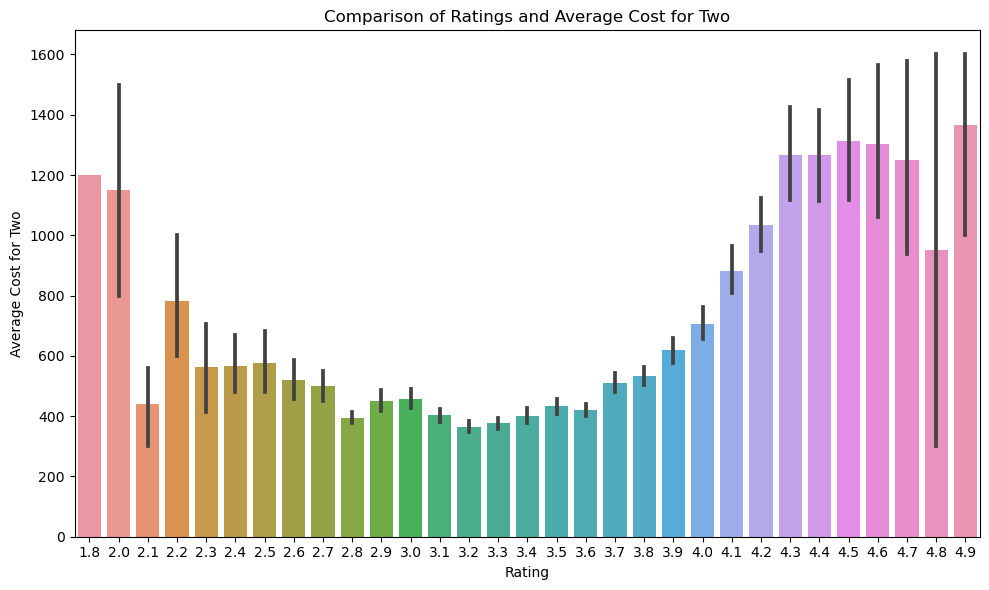

In [60]:
# Extracting 'Rating' and 'Average Cost for Two' columns from the filled DataFrame
ratings = df_filled['Rating']
avg_cost = df_filled['Average Cost for Two']

# Create a figure and axis
plt.figure(figsize=(10, 6))
ax = plt.subplot()

# Creating a bar plot for the comparison of average ratings and average cost
sns.barplot(x=ratings, y=avg_cost, ax=ax)

# Setting labels and title
plt.xlabel('Rating')
plt.ylabel('Average Cost for Two')
plt.title('Comparison of Ratings and Average Cost for Two')

# Displaying the plot
plt.tight_layout()
plt.show()


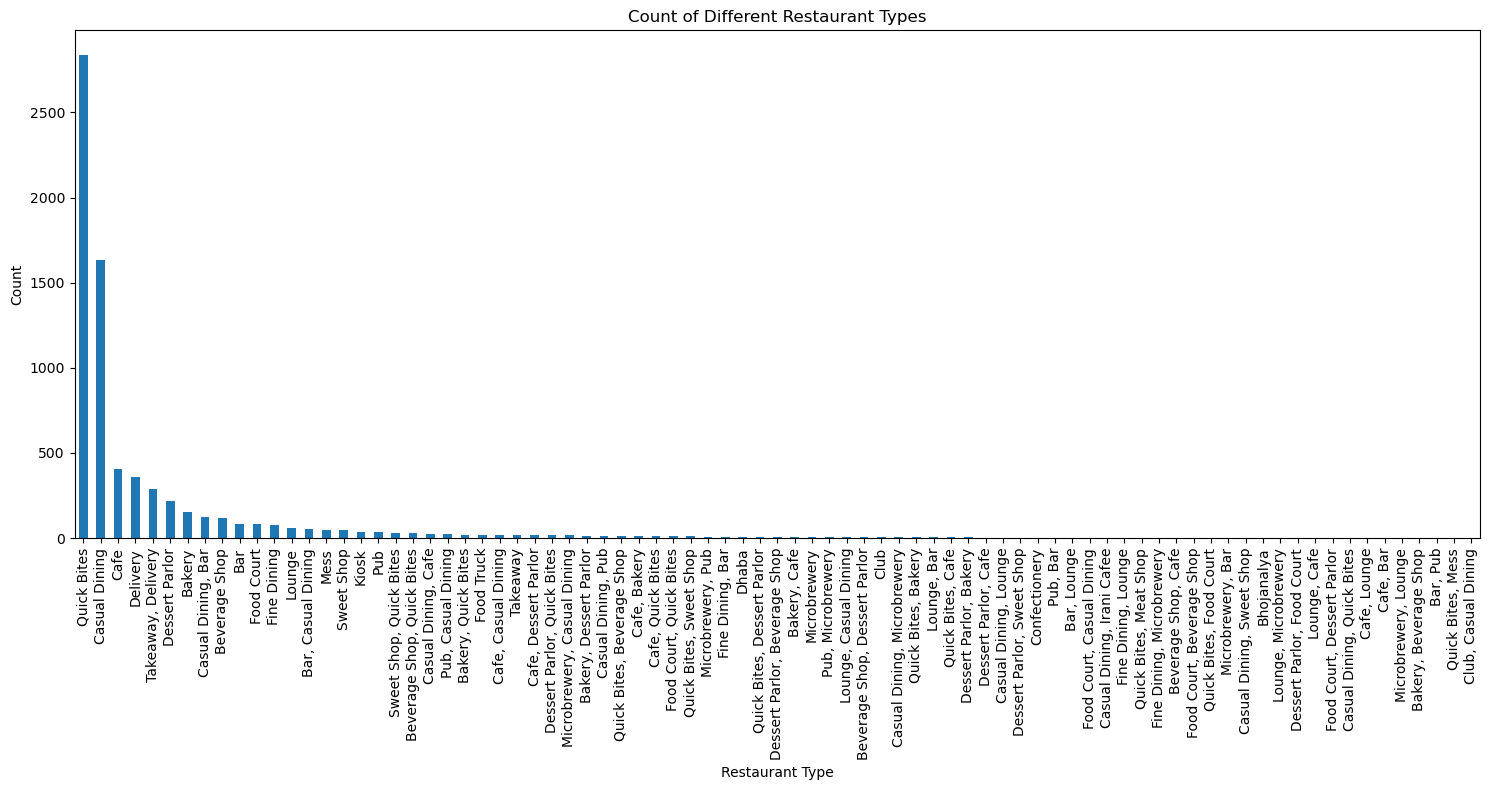

In [68]:
# Data
restaurant_types = df_filled['Restaurant Type'].value_counts()

# Create a figure and axis
plt.figure(figsize=(15, 8))
ax = plt.subplot()

# Bar plot for count of restaurant types
restaurant_types.plot(kind='bar', ax=ax)

# Set labels and title
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.title('Count of Different Restaurant Types')

# Rotate x-labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


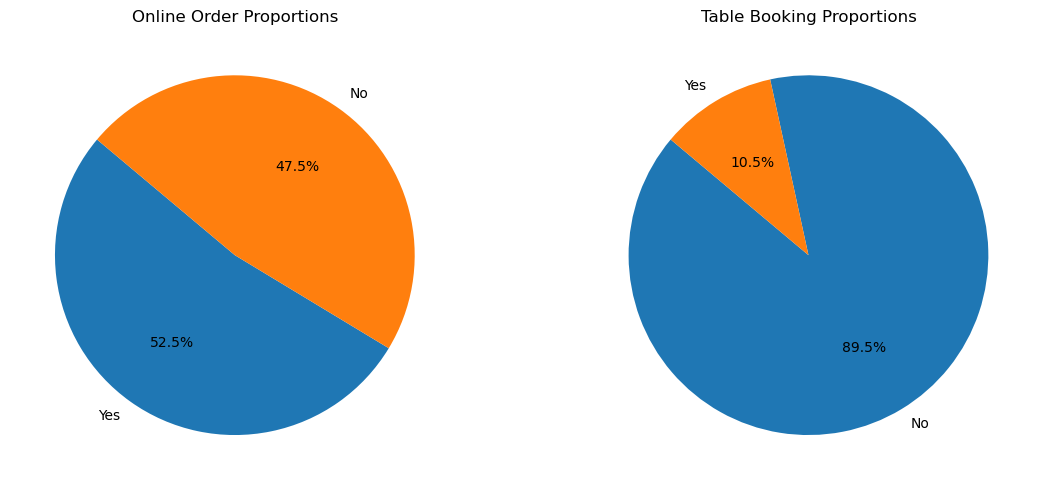

In [69]:
# Data
online_order_proportions = df_filled['Online Order'].value_counts()
table_booking_proportions = df_filled['Table Booking'].value_counts()

# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# Subplot 1: Online Order Proportions
plt.subplot(1, 2, 1)
plt.pie(online_order_proportions, labels=online_order_proportions.index, autopct='%1.1f%%', startangle=140)
plt.title('Online Order Proportions')

# Subplot 2: Table Booking Proportions
plt.subplot(1, 2, 2)
plt.pie(table_booking_proportions, labels=table_booking_proportions.index, autopct='%1.1f%%', startangle=140)
plt.title('Table Booking Proportions')

# Adjust layout
plt.tight_layout()
plt.show()


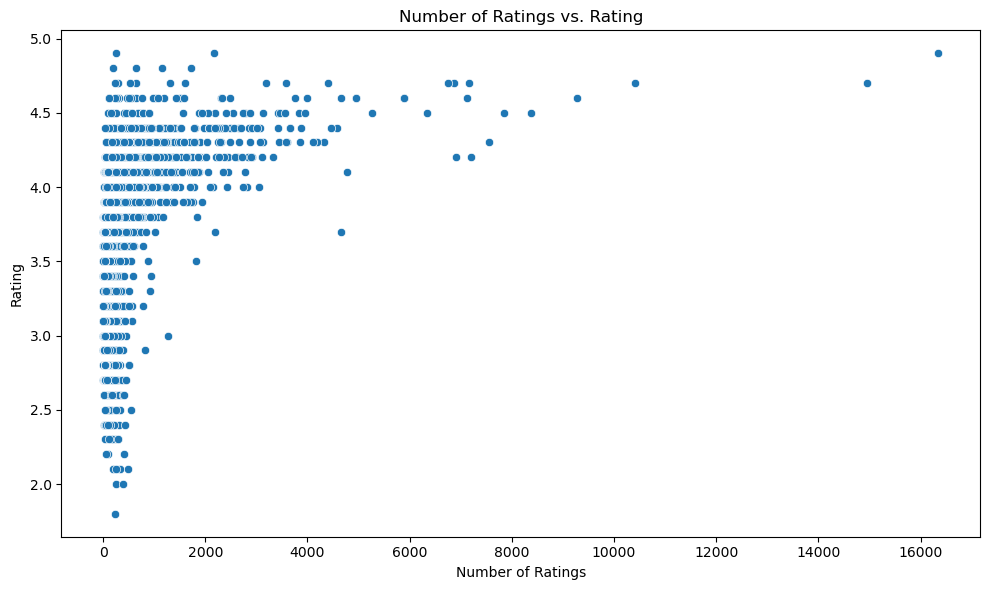

In [73]:
# Create a figure and axis
plt.figure(figsize=(10, 6))
ax = plt.subplot()

# Scatter plot for number of ratings vs. rating
sns.scatterplot(x='Number of Ratings', y='Rating', data=df_filled, ax=ax)

# Set labels and title
plt.xlabel('Number of Ratings')
plt.ylabel('Rating')
plt.title('Number of Ratings vs. Rating')

# Adjust layout
plt.tight_layout()
plt.show()


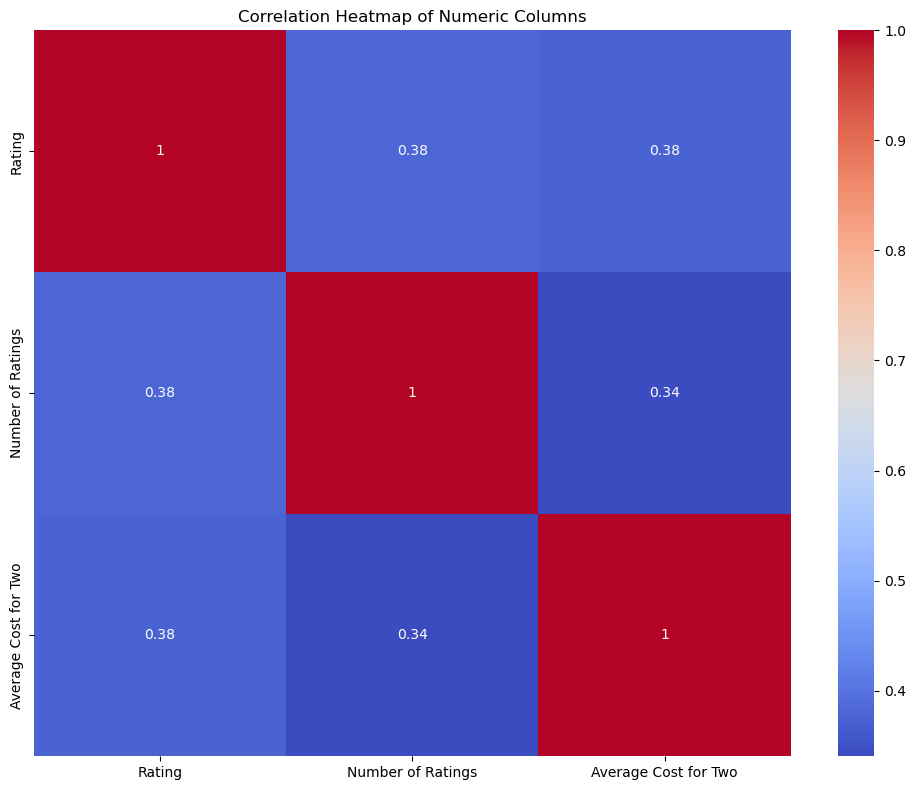

In [74]:
# Calculate the correlation matrix
correlation_matrix = df_filled.corr()

# Create a figure and axis
plt.figure(figsize=(10, 8))

# Heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set title
plt.title('Correlation Heatmap of Numeric Columns')

# Adjust layout
plt.tight_layout()
plt.show()


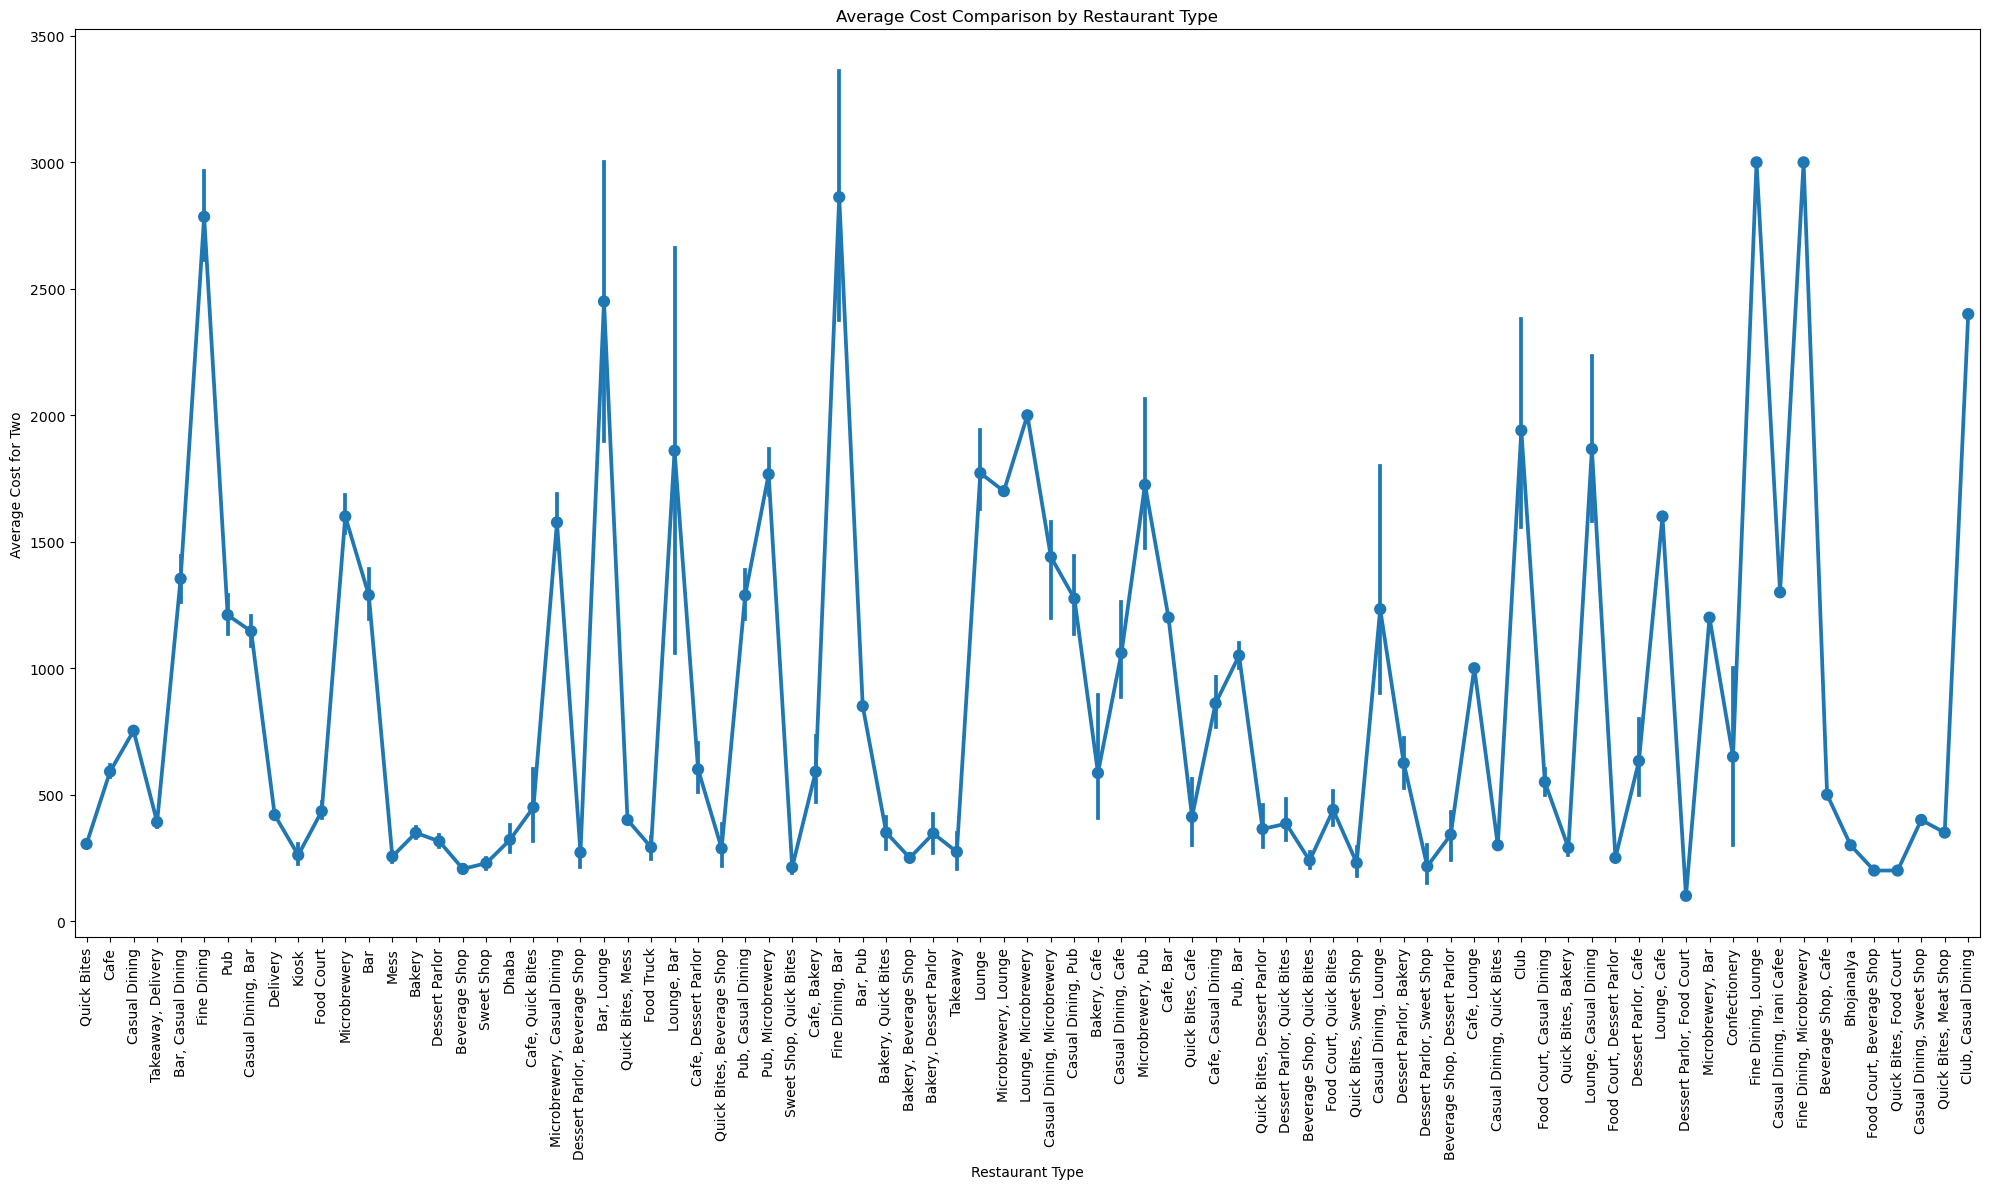

In [78]:
# Create a figure and axis
plt.figure(figsize=(20, 12))
ax = plt.subplot()

# Point plot for average cost comparison by restaurant type
sns.pointplot(x='Restaurant Type', y='Average Cost for Two', data=df_filled, ax=ax)
plt.xticks(rotation=90)

# Set labels and title
plt.xlabel('Restaurant Type')
plt.ylabel('Average Cost for Two')
plt.title('Average Cost Comparison by Restaurant Type')

# Adjust layout
plt.tight_layout()
plt.show()


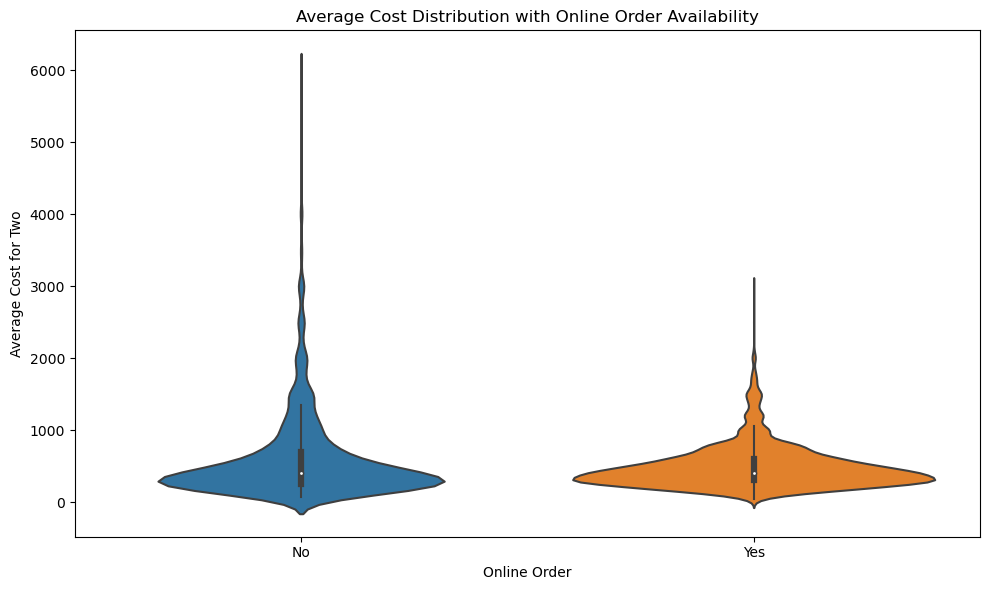

In [79]:
# Create a figure and axis
plt.figure(figsize=(10, 6))
ax = plt.subplot()

# Violin plot for average cost by online order availability
sns.violinplot(x='Online Order', y='Average Cost for Two', data=df_filled, ax=ax)

# Set labels and title
plt.xlabel('Online Order')
plt.ylabel('Average Cost for Two')
plt.title('Average Cost Distribution with Online Order Availability')

# Adjust layout
plt.tight_layout()
plt.show()


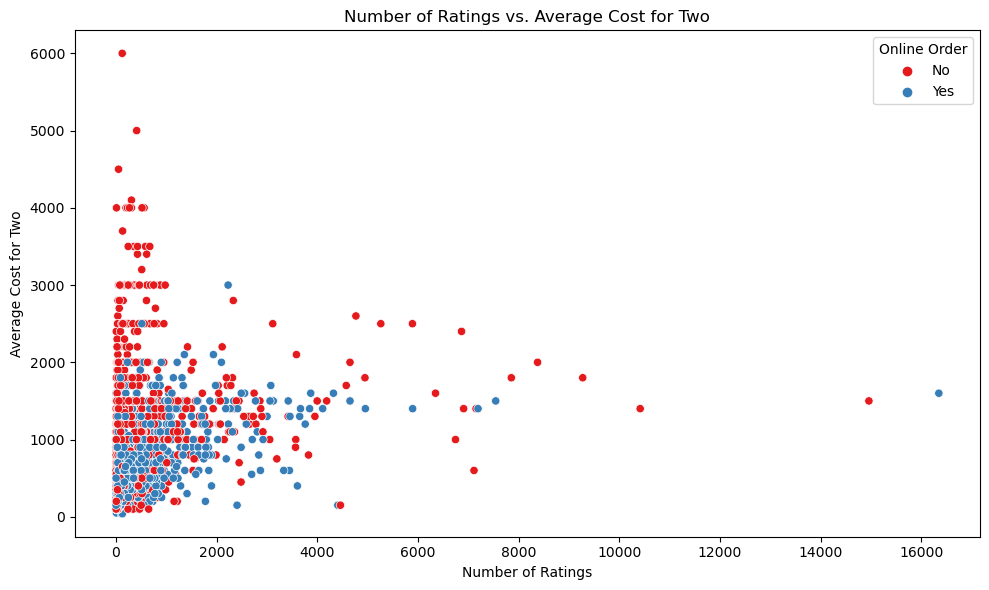

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot with color coding for online order availability
sns.scatterplot(x='Number of Ratings', y='Average Cost for Two', hue='Online Order', data=df_filled, palette='Set1')

# Set labels and title
plt.xlabel('Number of Ratings')
plt.ylabel('Average Cost for Two')
plt.title('Number of Ratings vs. Average Cost for Two')

# Display legend
plt.legend(title='Online Order')

# Adjust layout
plt.tight_layout()
plt.show()


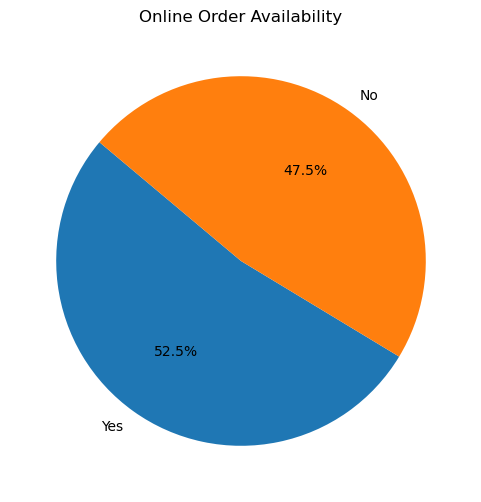

In [85]:
# Creating a pie chart to visualize online order availability
plt.figure(figsize=(6, 6))
online_order_counts = df_filled['Online Order'].value_counts()
plt.pie(online_order_counts, labels=online_order_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Online Order Availability')
plt.show()


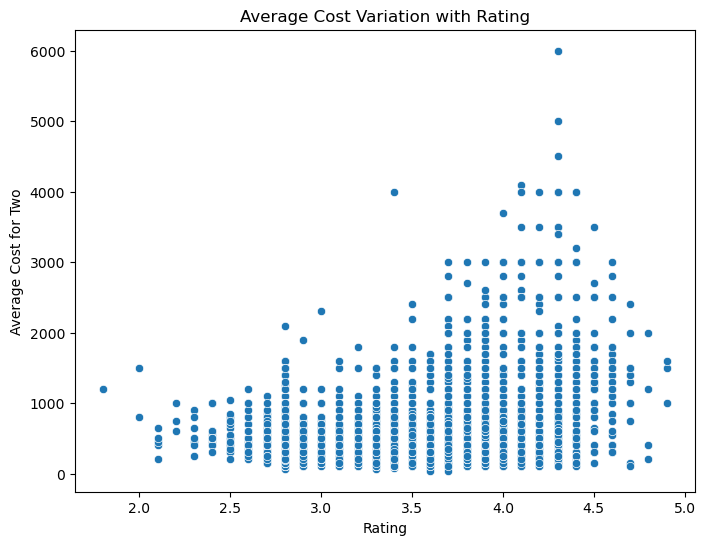

In [86]:
# Creating a scatter plot to visualize the relationship between rating and average cost
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rating', y='Average Cost for Two', data=df_filled)
plt.xlabel('Rating')
plt.ylabel('Average Cost for Two')
plt.title('Average Cost Variation with Rating')
plt.show()


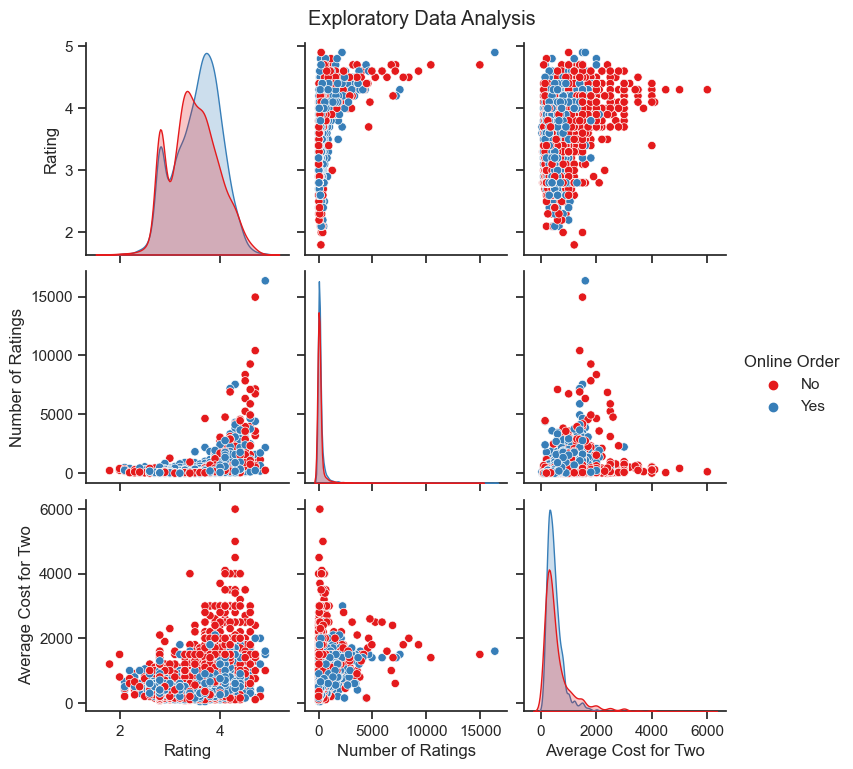

In [89]:
sns.set(style="ticks")

# Select relevant columns
columns_for_pairplot = ['Rating', 'Number of Ratings', 'Average Cost for Two']

# Add color coding based on online order availability
hue_column = 'Online Order'
df_filled[hue_column] = df_filled[hue_column].astype(str)

# Create a pairplot
sns.pairplot(df_filled, vars=columns_for_pairplot, hue=hue_column, diag_kind='kde', palette='Set1')

# Set the title
plt.suptitle('Exploratory Data Analysis', y=1.02)

# Display the plot
plt.show()